<a href="https://colab.research.google.com/github/HannaK79/Sales-analytics/blob/main/Sales_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")


from google.colab import drive
drive.mount("/content/drive")


%cd /content/drive/MyDrive/python_tasks



events = pd.read_csv("/content/drive/MyDrive/python_tasks/events.csv")
products = pd.read_csv("/content/drive/MyDrive/python_tasks/products.csv")
countries = pd.read_csv("/content/drive/MyDrive/python_tasks/countries.csv")


events.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/python_tasks


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


In [19]:
events.describe()

,Order ID,Product ID,Units Sold,Unit Price,Unit Cost
count,1.330000e+03,1330.000000,1328.000000,1330.000000,1330.000000
mean,5.412048e+08,5788.096241,4952.201807,264.893541,187.246812
std,2.573882e+08,2820.728878,2905.198996,217.323460,176.158873
min,1.006406e+08,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,3127.000000,2356.750000,81.730000,35.840000
50%,5.387164e+08,5988.000000,4962.000000,154.060000,97.440000
75%,7.544628e+08,8681.000000,7459.500000,437.200000,263.330000
max,9.998797e+08,8969.000000,9999.000000,668.270000,524.960000


In [20]:
events["Product ID"].value_counts().head(10)  # топ-10 товарів
# events["Country Code"].value_counts().head(10)  # топ-10 країн
events["Order Date"]= pd.to_datetime(events["Order Date"])
events["Ship Date"]= pd.to_datetime(events["Ship Date"])
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1330 non-null   int64         
 1   Order Date      1330 non-null   datetime64[ns]
 2   Ship Date       1330 non-null   datetime64[ns]
 3   Order Priority  1330 non-null   object        
 4   Country Code    1248 non-null   object        
 5   Product ID      1330 non-null   int64         
 6   Sales Channel   1330 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1330 non-null   float64       
 9   Unit Cost       1330 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 104.0+ KB


In [21]:
# кількість пропущених значень у кожному стовпчику
print(events.isna().sum())

Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64


In [22]:
events["Country Code"] = events["Country Code"].fillna("Unknown")
median_units = events["Units Sold"].median()
events["Units Sold"] = events["Units Sold"].fillna(median_units)
events.describe()

,Order ID,Order Date,Ship Date,Product ID,Units Sold,Unit Price,Unit Cost
count,1.330000e+03,1330,1330,1330.000000,1330.000000,1330.000000,1330.000000
mean,5.412048e+08,2013-10-12 06:09:12.180451072,2013-11-06 00:46:33.383458816,5788.096241,4952.216541,264.893541,187.246812
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,2011-12-16 06:00:00,2012-01-03 00:00:00,3127.000000,2360.750000,81.730000,35.840000
50%,5.387164e+08,2013-10-17 00:00:00,2013-11-09 00:00:00,5988.000000,4962.000000,154.060000,97.440000
75%,7.544628e+08,2015-08-28 18:00:00,2015-10-03 18:00:00,8681.000000,7458.750000,437.200000,263.330000
max,9.998797e+08,2017-07-23 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573882e+08,NaN,NaN,2820.728878,2903.012194,217.323460,176.158873


In [ ]:
duplicate_rows = events.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0       False
1       False
2       False
3       False
4       False
        ...  
1325    False
1326    False
1327    False
1328    False
1329    False
Length: 1330, dtype: bool
0


In [ ]:
products.head()


,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [ ]:
products.describe()

,id
count,12.000000
mean,5802.166667
std,2937.985452
min,1270.000000
25%,2959.000000
50%,6659.500000
75%,8390.000000
max,8969.000000


In [ ]:
duplicate_rows = products.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool
0


In [ ]:
countries.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [23]:
countries.describe()

,name,alpha-2,alpha-3,region,sub-region
count,249,248,249,248,248
unique,249,248,249,5,17
top,Afghanistan,AF,AFG,Africa,Sub-Saharan Africa
freq,1,1,1,60,53


In [24]:
countries.fillna("Unknown", inplace=True)
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     249 non-null    object
 2   alpha-3     249 non-null    object
 3   region      249 non-null    object
 4   sub-region  249 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [25]:
duplicate_rows = countries.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0      False
1      False
2      False
3      False
4      False
       ...  
244    False
245    False
246    False
247    False
248    False
Length: 249, dtype: bool
0


In [26]:
df = events.merge(products, left_on="Product ID", right_on= "id", how="left")
df_new_data = df.merge(countries,left_on="Country Code", right_on="alpha-3", how="left")
df_new_data.drop(["alpha-2", "alpha-3", "id"], axis=1, inplace=True)


df_new_data.rename(columns={
    "name": "Country",
    "region": "Region",
    "sub-region": "Sub Region",
    "item_type": "Product Category",
    "Order ID": "Order ID",
    "Order Date": "Order Date",
    "Ship Date": "Ship Date",
    "Order Priority": "Order Priority",
    "Country Code": "Country Code",
    "Product ID": "Product ID",
    "Sales Channel": "Sales Channel",
    "Units Sold": "Units Sold",
    "Unit Price": "Unit Price",
    "Unit Cost": "Unit Cost"
}, inplace=True)
df_new_data["Sales Channel"] = df_new_data["Sales Channel"].str.capitalize()

In [27]:
# Загальна кількість замовлень, загальний прибуток, загальна кількість охоплених країн
df_new_data["Order ID"].nunique() #загальна кіль-сть замовлень
df_new_data["Revenue"] = df_new_data["Units Sold"] * df_new_data["Unit Price"] #загальний дохід
df_new_data["Total Cost"] = df_new_data["Units Sold"] * df_new_data["Unit Cost"]#загальниі витрати
df_new_data["Profit"] = df_new_data["Revenue"] - df_new_data["Total Cost"]#загальний прибуток
df_new_data["Country"].nunique()#загальна кіль-сть охоплень країн

print("Загальна кількість замовлень:", df_new_data["Order ID"].nunique())
print("Загальний дохід:", df_new_data["Revenue"].sum())
print("Загальні витрати:", df_new_data["Total Cost"].sum())
print("Загальний прибуток:", df_new_data["Profit"].sum())
print("Кількість охоплених країн:", df_new_data["Country"].nunique())



Загальна кількість замовлень: 1330
Загальний дохід: 1704628370.65
Загальні витрати: 1202785737.5299997
Загальний прибуток: 501842633.11999995
Кількість охоплених країн: 45


#Аналіз продажів (доходи, витрати, прибутки, популярність товарів) в розрізі:

1.категорій товарів;

2.географії (країн, регіонів);

3.каналів продажу (онлайн або офлайн).

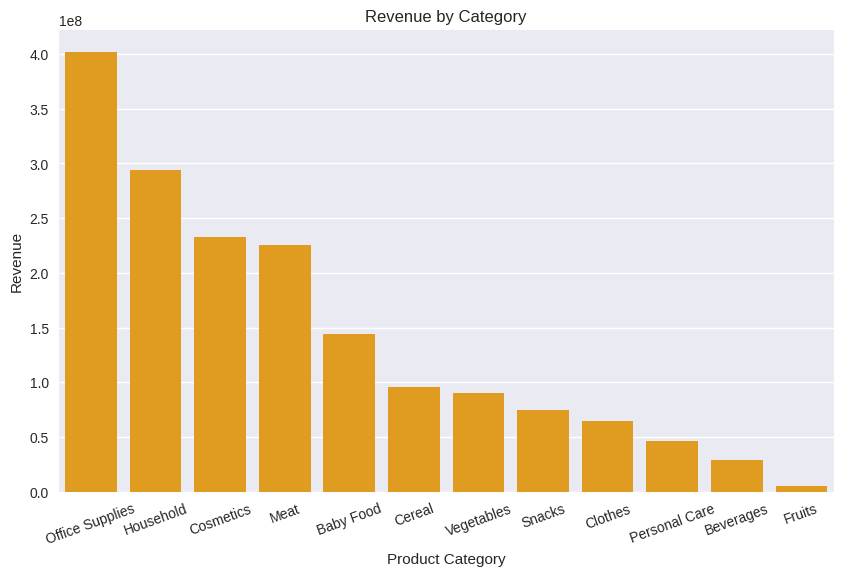

In [28]:
# Revenue за категоріями
revenue_series_data = df_new_data.groupby( "Product Category")["Revenue"].sum().reset_index()
revenue_series_data = revenue_series_data.sort_values("Revenue", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=revenue_series_data, x="Product Category", y="Revenue", color= "orange")
plt.title("Revenue by Category")
plt.xticks(rotation=20)
plt.show()

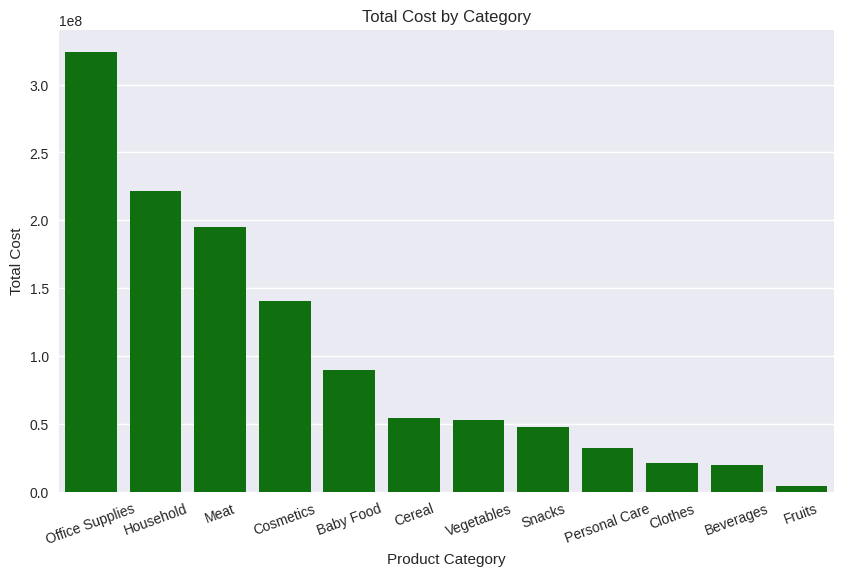

In [29]:
# Total Cost за категоріями
cost_series_data = df_new_data.groupby( "Product Category")["Total Cost"].sum().reset_index()
cost_series_data = cost_series_data.sort_values("Total Cost", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=cost_series_data, x="Product Category", y="Total Cost", color= "green")
plt.title("Total Cost by Category")
plt.xticks(rotation=20)
plt.show()

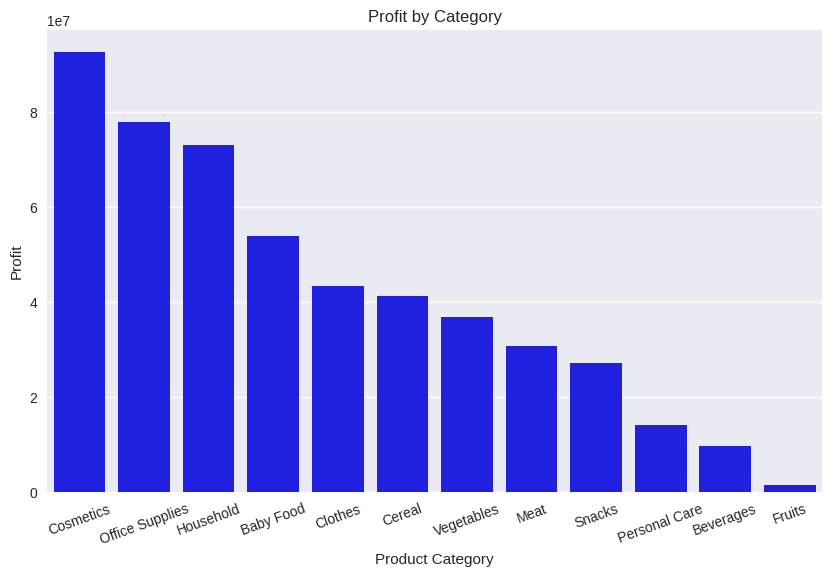

In [30]:
# Profit за категоріями
profit_series_data = df_new_data.groupby( "Product Category")["Profit"].sum().reset_index()

profit_series_data = profit_series_data.sort_values("Profit", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=profit_series_data, x="Product Category", y="Profit", color= "blue")
plt.title("Profit by Category")
plt.xticks(rotation=20)
plt.show()


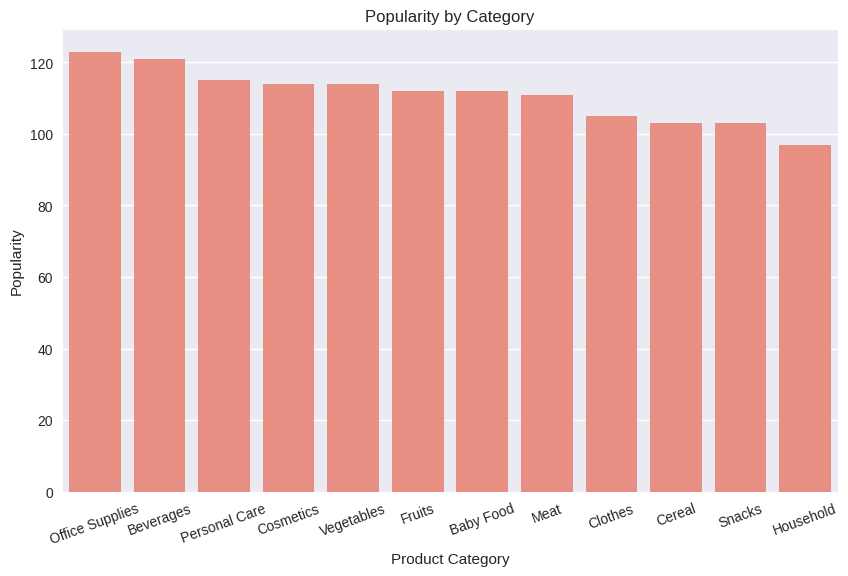

In [31]:
# Popularity за категоріями

popularity_series_data = df_new_data.groupby("Product Category")["Order ID"].nunique().reset_index()
popularity_series_data.rename(columns={"Order ID": "Popularity"}, inplace=True)

popularity_series_data = popularity_series_data.sort_values("Popularity", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=popularity_series_data, x="Product Category", y="Popularity", color= "salmon")
plt.title("Popularity by Category")
plt.xticks(rotation=20)
plt.show()

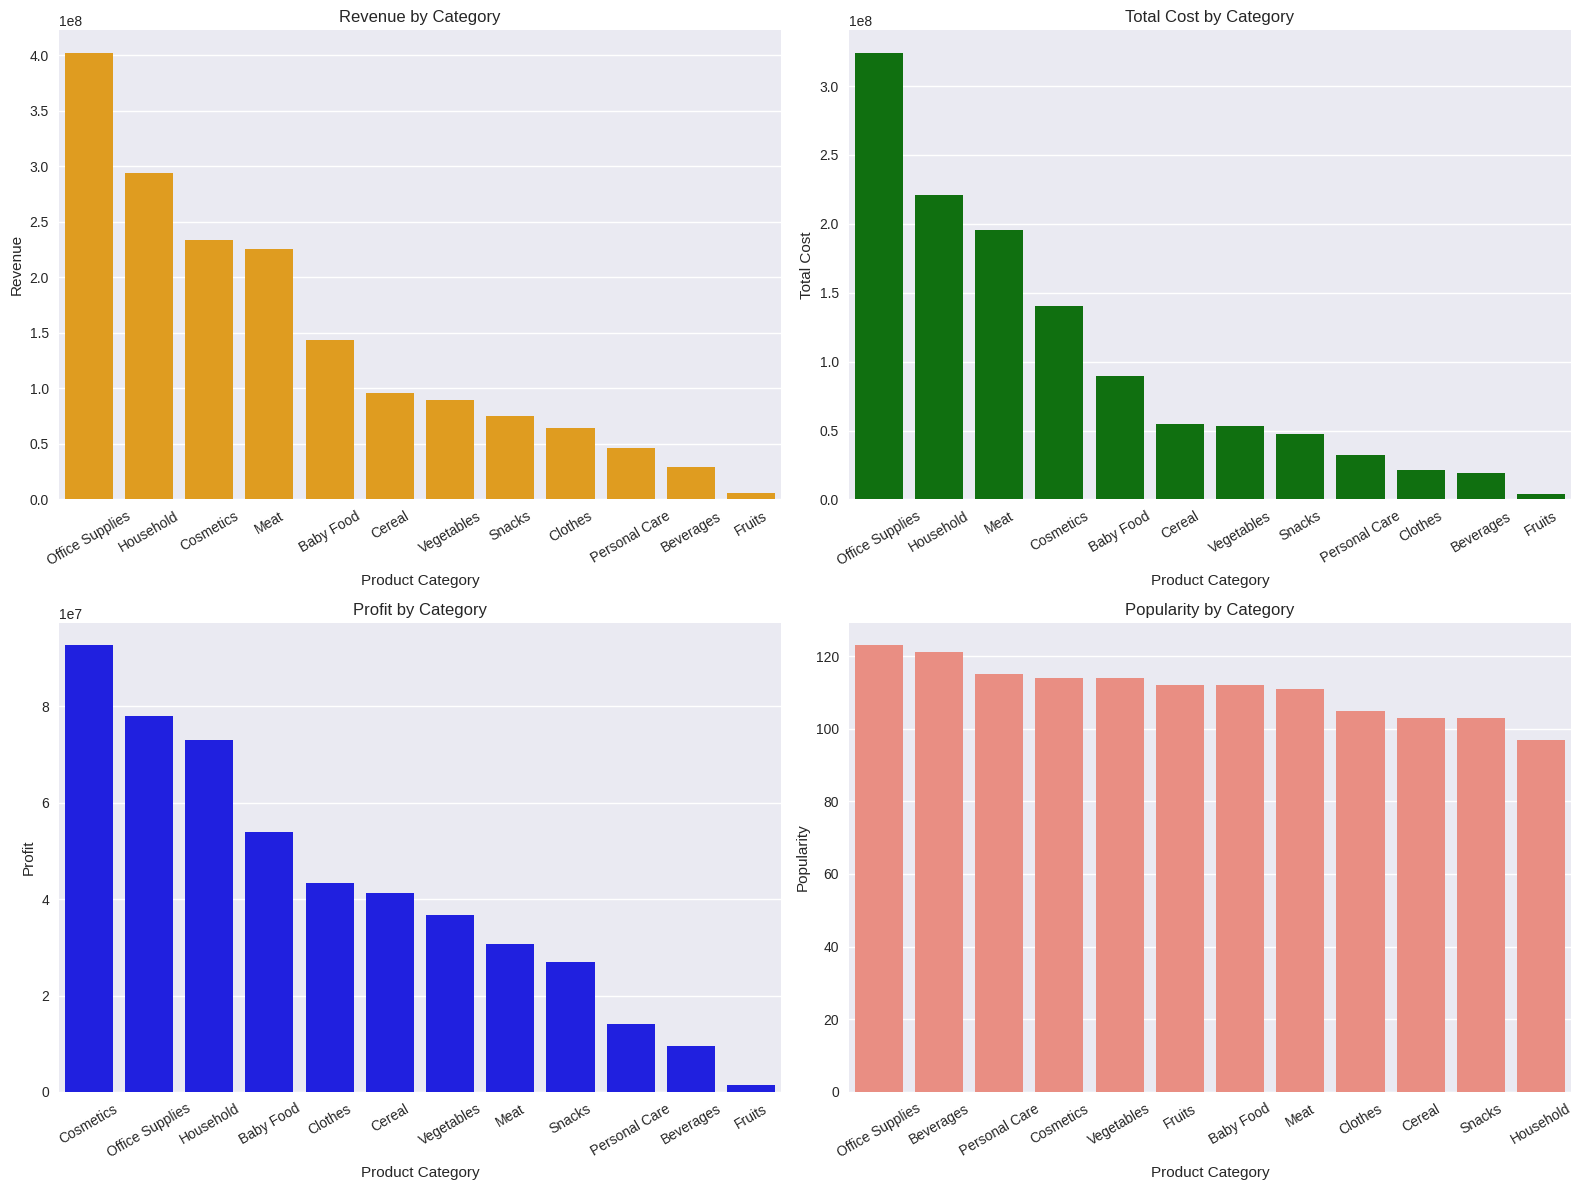

In [32]:
# 4 показника разом,для співставлення

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Revenue
sns.barplot(data=revenue_series_data, x="Product Category", y="Revenue",color="orange", ax=axes[0,0])
axes[0,0].set_title("Revenue by Category")
axes[0,0].tick_params(axis="x", rotation=30)

# 2. Total Cost
sns.barplot(data=cost_series_data, x="Product Category", y="Total Cost",color="green", ax=axes[0,1])
axes[0,1].set_title("Total Cost by Category")
axes[0,1].tick_params(axis="x", rotation=30)

# 3. Profit
sns.barplot(data=profit_series_data, x="Product Category", y="Profit",color="blue", ax=axes[1,0])
axes[1,0].set_title("Profit by Category")
axes[1,0].tick_params(axis="x", rotation=30)

# 4. Popularity
sns.barplot(data=popularity_series_data, x="Product Category", y="Popularity",color="salmon", ax=axes[1,1])
axes[1,1].set_title("Popularity by Category")
axes[1,1].tick_params(axis="x", rotation=30)

plt.tight_layout()
plt.show()

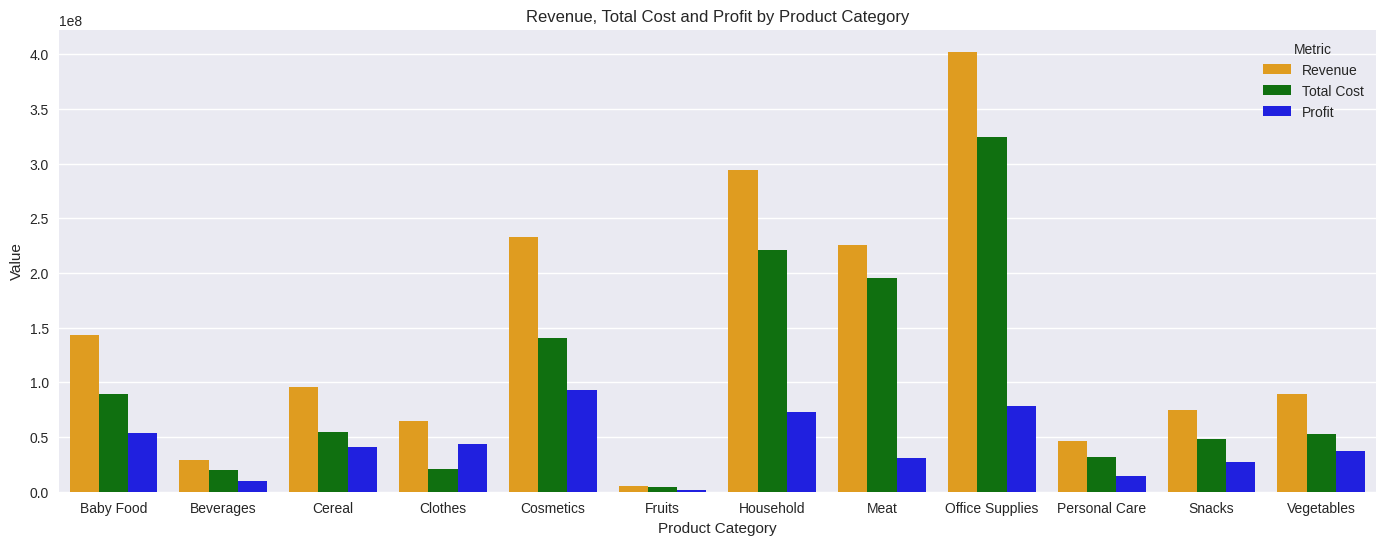

In [33]:
product_series_data = df_new_data.groupby( "Product Category")[["Profit","Revenue","Total Cost"]].sum().reset_index()
melted = product_series_data.melt(id_vars="Product Category",value_vars=["Revenue", "Total Cost", "Profit"],var_name="Metric",value_name="Value")

plt.figure(figsize=(17,6))
sns.barplot(data=melted,x="Product Category",y="Value",hue="Metric",palette={"Revenue": "orange", "Total Cost": "green", "Profit": "blue"})

plt.xticks(rotation=0)
plt.title("Revenue, Total Cost and Profit by Product Category")
plt.show()


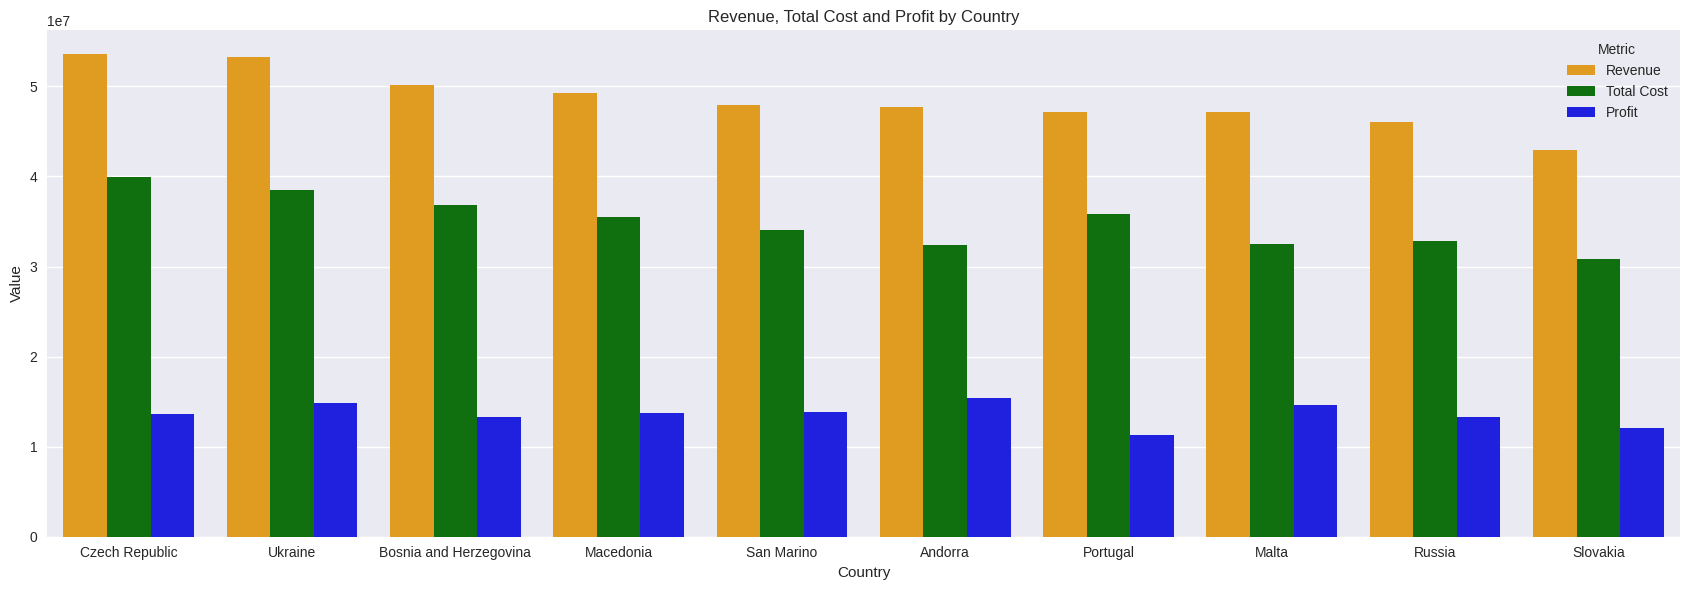

In [34]:
# По країнах,топ 10, melt - перетворює широку таблицю в довгу

top10_countries = (df_new_data.groupby("Country")[["Revenue", "Profit", "Total Cost"]].sum().reset_index().sort_values("Revenue", ascending=False).head(10))

melted = top10_countries.melt(id_vars="Country",value_vars=["Revenue", "Total Cost", "Profit"],var_name="Metric",value_name="Value")

plt.figure(figsize=(17,6))
sns.barplot(data=melted,x="Country",y="Value",hue="Metric",palette={"Revenue": "orange", "Total Cost": "green", "Profit": "blue"})

plt.title("Revenue, Total Cost and Profit by Country")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

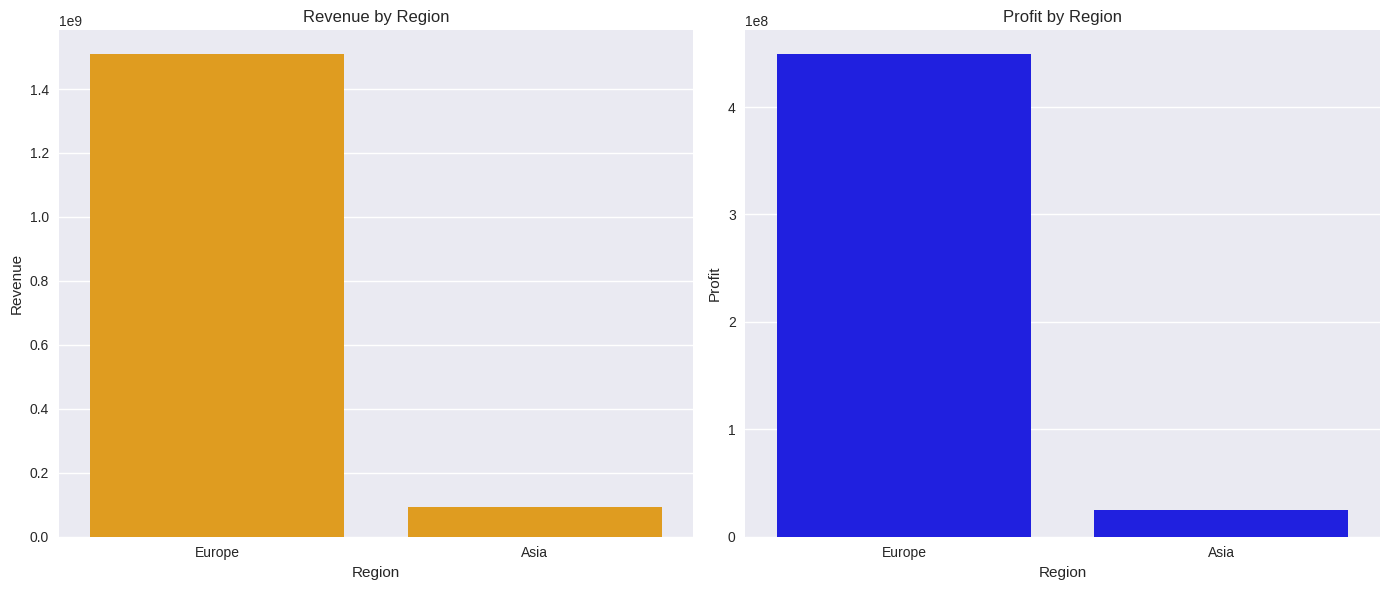

In [35]:
# По регіонах
region = df_new_data.groupby("Region")[["Revenue","Profit"]].sum().reset_index().sort_values("Revenue", ascending=False)
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(data=region, x="Region", y="Revenue", ax=axes[0], color="orange")
axes[0].set_title("Revenue by Region")
axes[0].tick_params(axis="x", rotation=0)

sns.barplot(data=region, x="Region", y="Profit", ax=axes[1], color="blue")
axes[1].set_title("Profit by Region")
axes[1].tick_params(axis="x", rotation=0)

plt.tight_layout()
plt.show()

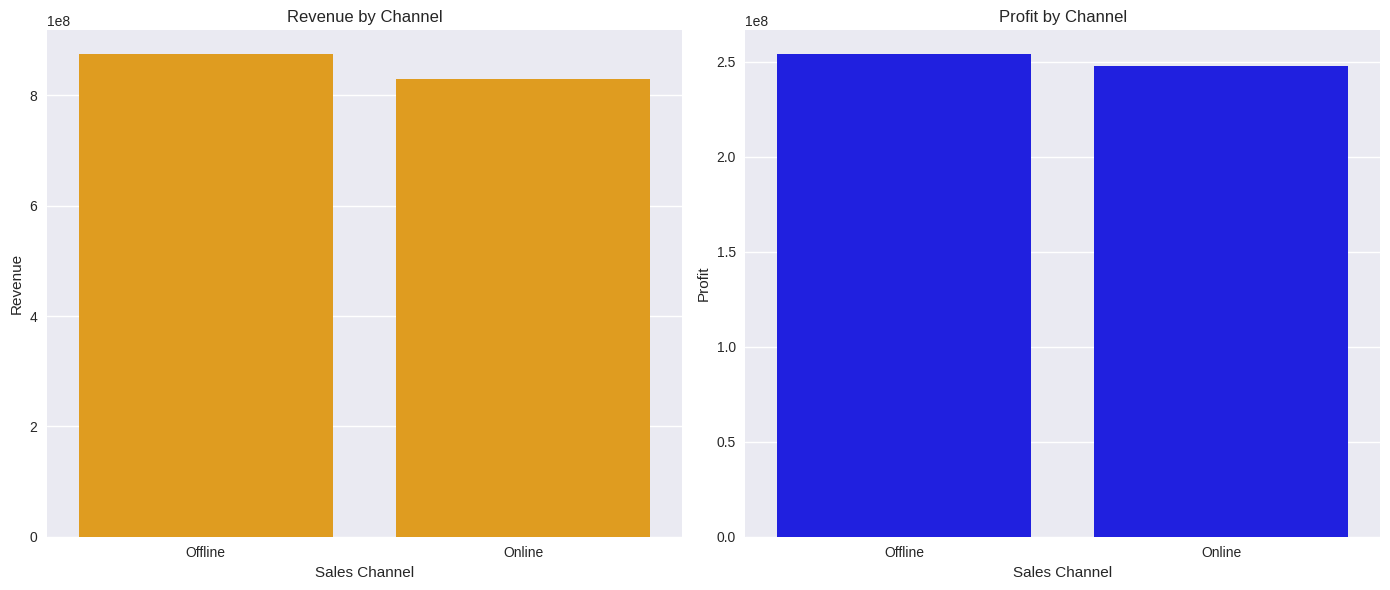

In [36]:
# По каналам продажу (онлайн або офлайн)
channel_series_data = df_new_data.groupby( "Sales Channel")[["Revenue","Profit"]].sum().reset_index()


fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(data=channel_series_data, x="Sales Channel", y="Revenue", ax=axes[0], color="orange")
axes[0].set_title("Revenue by Channel")
axes[0].tick_params(axis="x", rotation=0)

sns.barplot(data=channel_series_data, x="Sales Channel", y="Profit", ax=axes[1], color="blue")
axes[1].set_title("Profit by Channel")
axes[1].tick_params(axis="x", rotation=0)

plt.tight_layout()
plt.show()


#Аліз інтервалу часу між замовленням та його відвантаженням в розрізі:

1.категорій товарів;

2.країн;

3.регіонів.

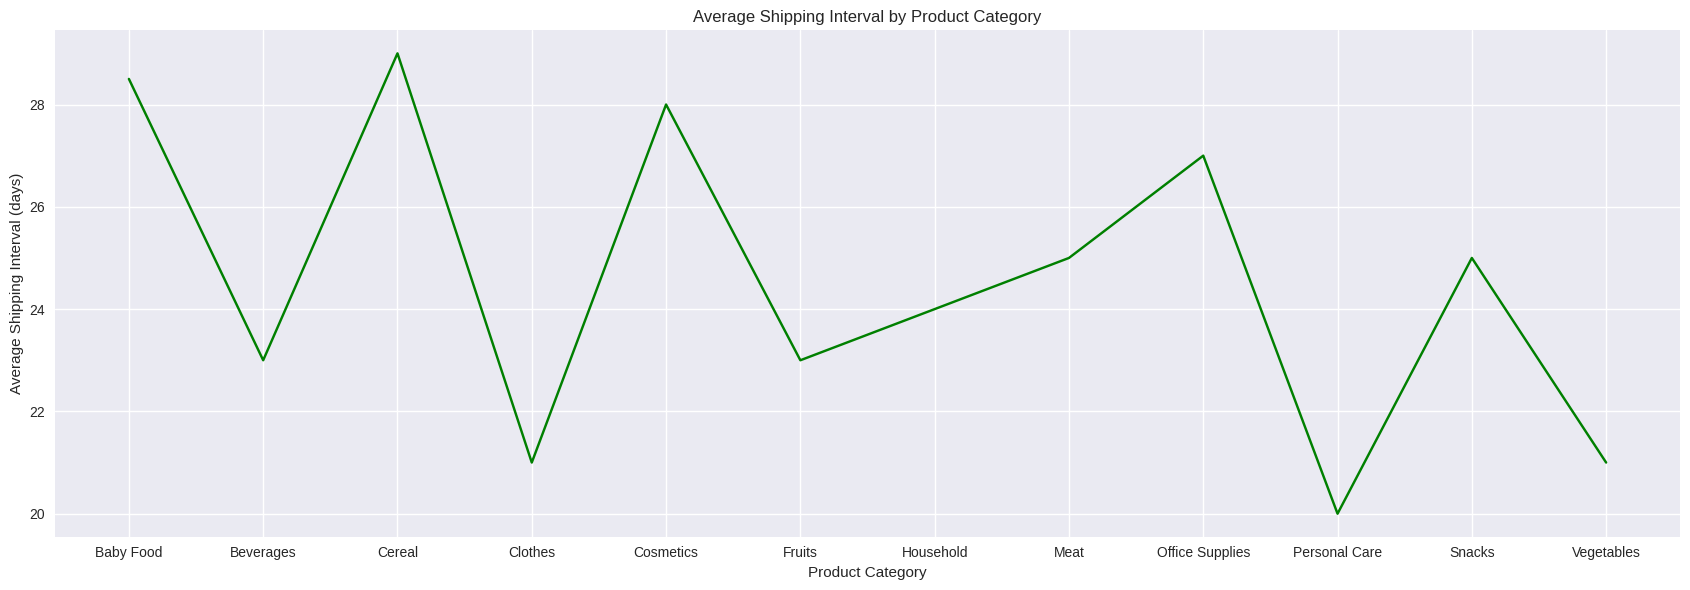

In [37]:
# створюємо days_to_ship
df_new_data["Order Date"] = pd.to_datetime(df_new_data["Order Date"], errors="coerce")
df_new_data["Ship Date"]  = pd.to_datetime(df_new_data["Ship Date"],  errors="coerce")
df_new_data["days_to_ship"] = (df_new_data["Ship Date"] - df_new_data["Order Date"]).dt.days

# групування
interval_series_data = (df_new_data.groupby("Product Category")["days_to_ship"].median().reset_index(name="avg_interval"))

# лінійний графік
plt.figure(figsize=(17,6))
sns.lineplot(data=interval_series_data, x="Product Category", y="avg_interval", color="green")
plt.title("Average Shipping Interval by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Shipping Interval (days)")
plt.xticks(rotation=0, ha="center")
plt.tight_layout()
plt.show()

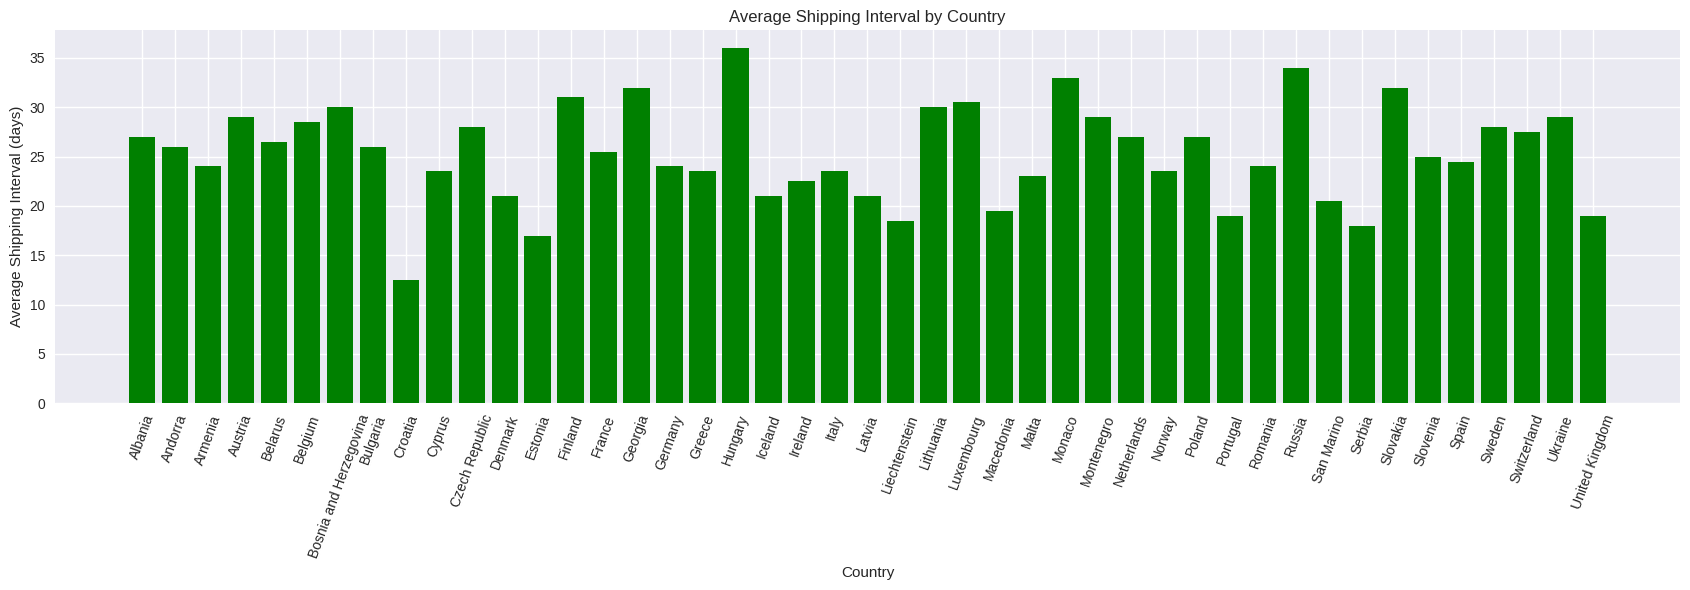

In [38]:

interval_series_data = (df_new_data.groupby("Country")["days_to_ship"].median().reset_index(name="avg_interval"))

plt.figure(figsize=(17,6))
plt.bar(interval_series_data["Country"], interval_series_data["avg_interval"], color="green")
plt.title("Average Shipping Interval by Country")
plt.xlabel("Country")
plt.ylabel("Average Shipping Interval (days)")
plt.xticks(rotation=70, ha="center")
plt.tight_layout()
plt.show()



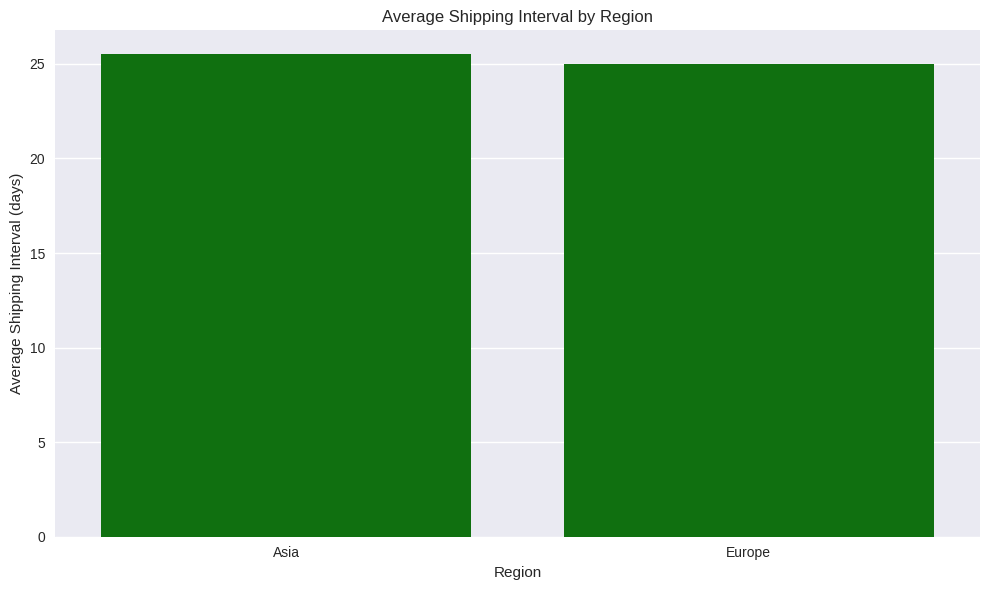

In [39]:
interval_series_data = df_new_data.groupby("Region")["days_to_ship"].median().reset_index(name="avg_interval")



plt.figure(figsize=(10,6))
sns.barplot(data=interval_series_data,x="Region",y="avg_interval",color="green")
plt.title("Average Shipping Interval by Region")
plt.xlabel("Region")
plt.ylabel("Average Shipping Interval (days)")
plt.xticks(rotation=0, ha="center")
plt.tight_layout()
plt.show()

#Аліз, залежності прибуток від часу, необхідного на відвантаження товару.

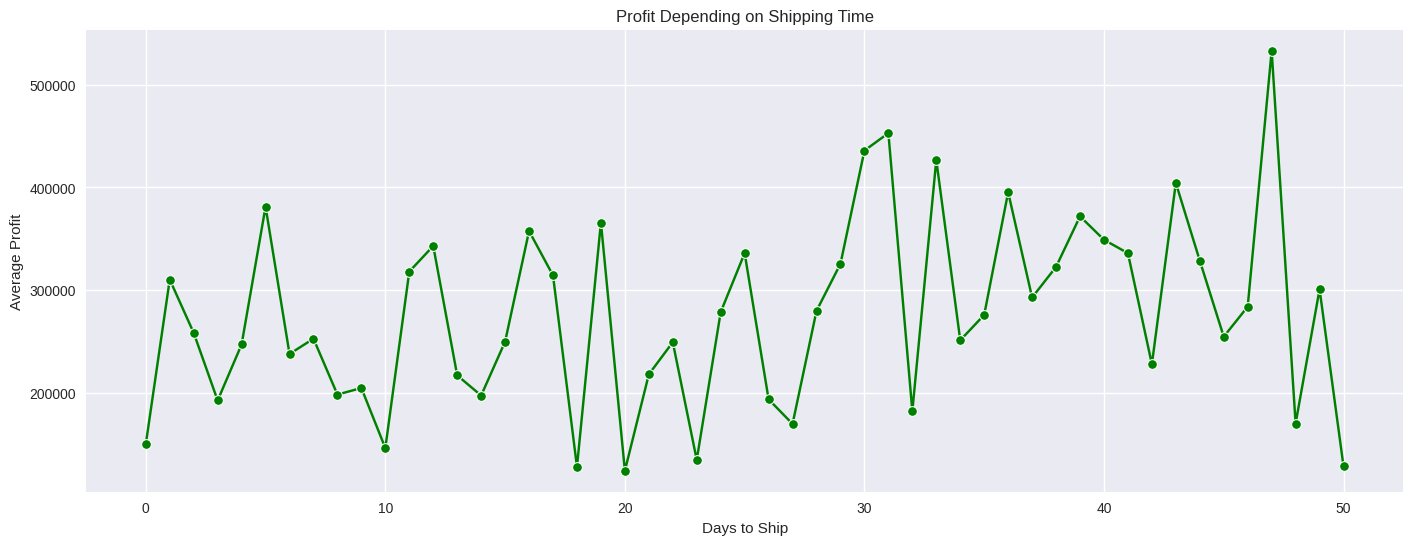

In [40]:
df_new_data["days_to_ship"] = (df_new_data["Ship Date"] - df_new_data["Order Date"]).dt.days
profit_by_days = (df_new_data.groupby("days_to_ship")[ "Profit"].median().reset_index())


plt.figure(figsize=(17,6))
sns.lineplot(data=profit_by_days, x="days_to_ship", y="Profit", marker="o", color="green")
plt.title("Profit Depending on Shipping Time")
plt.xlabel("Days to Ship")
plt.ylabel("Average Profit")
plt.grid(True)
plt.show()

#Ааліз динаміки продажів (у часі) у розрізі:

1.категорій товарів;

2.країн;

3.регіонів

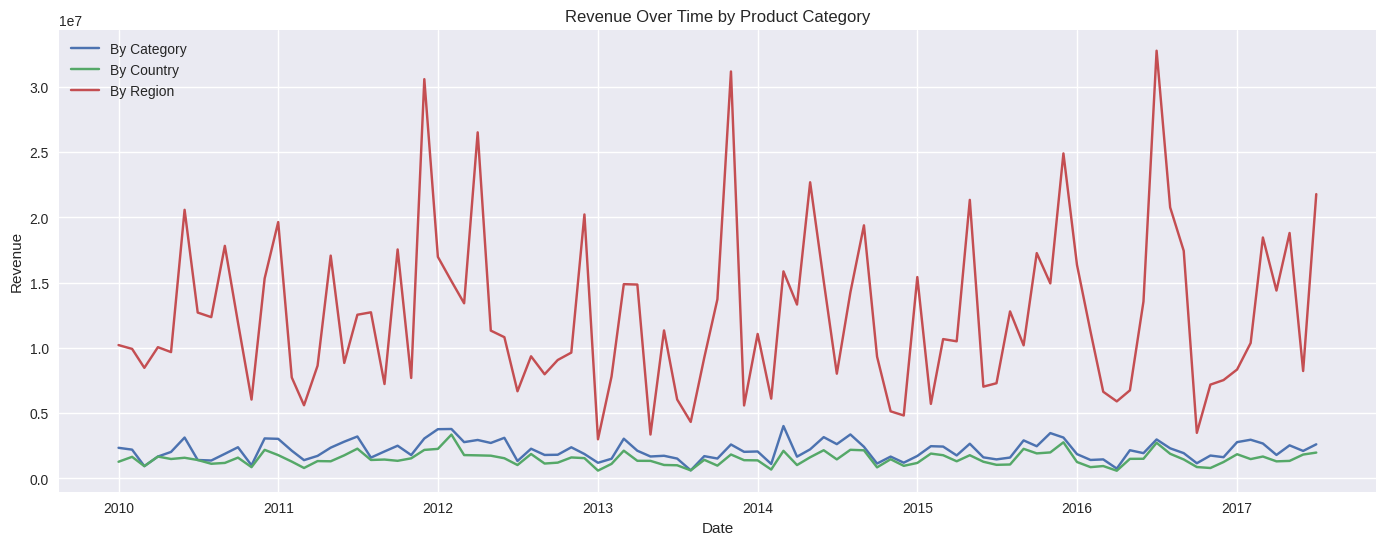

In [41]:
# Динаміка продажів у часі (по місяцям), в розрізі категорій, країн, регіонів
df_new_data["YearMonth"] = df_new_data["Order Date"].dt.to_period("M").dt.to_timestamp()
sales_over_time_category = df_new_data.groupby(["YearMonth","Product Category"])["Revenue"].sum().reset_index()
sales_over_time_country = df_new_data.groupby(["YearMonth","Country"])["Revenue"].sum().reset_index()
sales_over_time_region = df_new_data.groupby(["YearMonth","Region"])["Revenue"].sum().reset_index()

plt.figure(figsize=(17,6))
sns.lineplot(data=sales_over_time_category, x="YearMonth", y="Revenue", label="By Category" ,errorbar=None)
sns.lineplot(data=sales_over_time_country,  x="YearMonth", y="Revenue", label="By Country", errorbar=None)
sns.lineplot(data=sales_over_time_region,   x="YearMonth", y="Revenue", label="By Region", errorbar=None)
plt.title("Revenue Over Time by Product Category")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

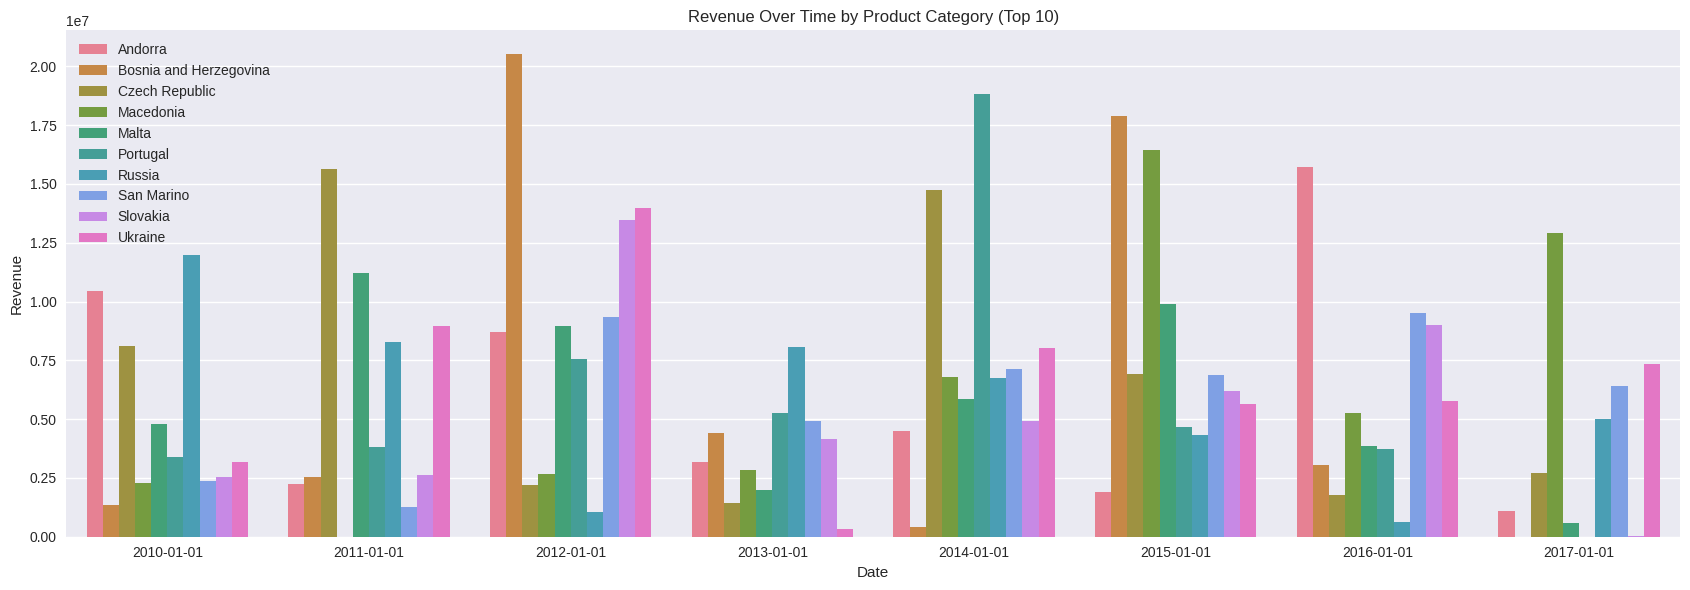

In [42]:
# Топ-10 країн,з найвищими показниками продажу у часі (по рокам)
df_new_data["Year"] = df_new_data["Order Date"].dt.to_period("Y").dt.to_timestamp()

top_countries = df_new_data.groupby("Country")["Revenue"].sum().sort_values(ascending=False).head(10).index

sales_over_time_country = df_new_data.groupby(["Year","Country"])["Revenue"].sum().reset_index()

filtered = sales_over_time_country[sales_over_time_country["Country"].isin(top_countries)]

plt.figure(figsize=(17,6))
sns.barplot(data=filtered,  x="Year", y="Revenue",hue="Country", errorbar=None)
plt.xticks(rotation=0)
plt.title("Revenue Over Time by Product Category (Top 10)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.tight_layout()
plt.show()

#Аналіз продажу товарів за днями тижня

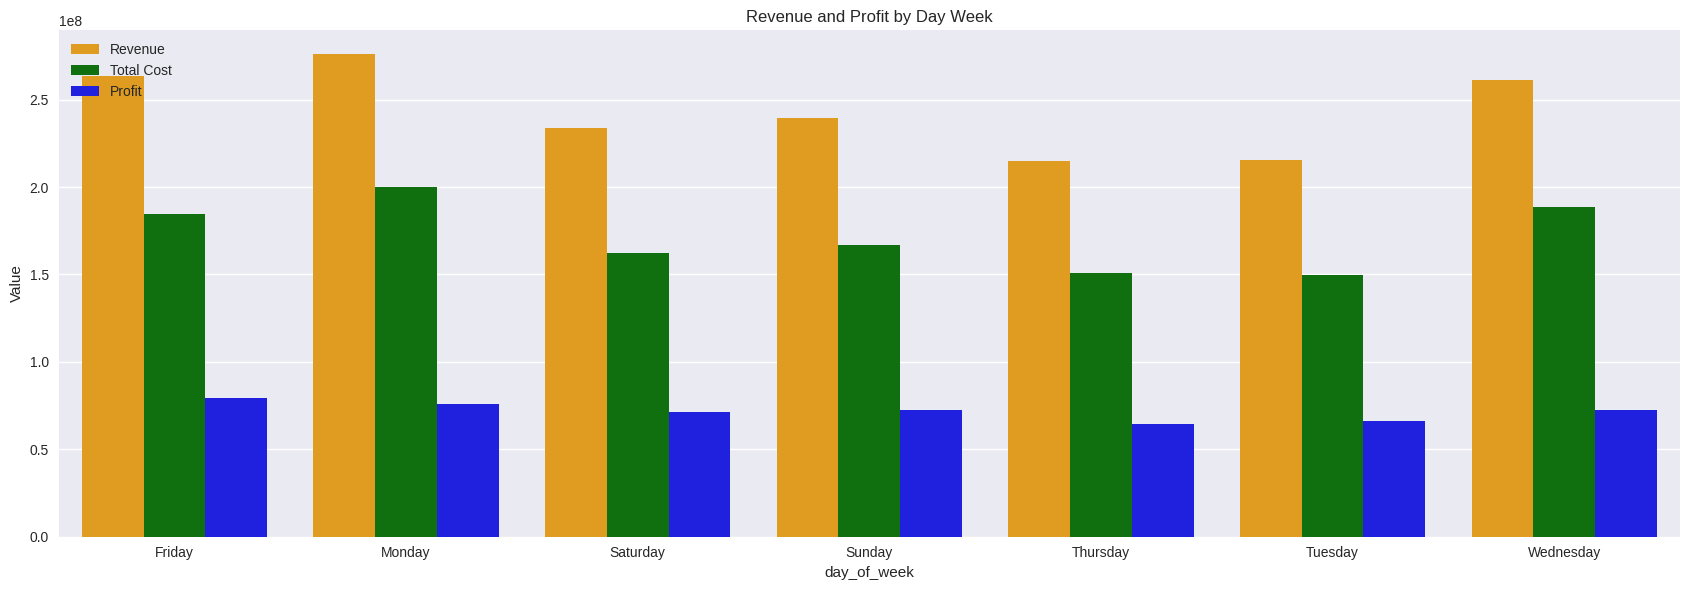

In [43]:
df_new_data["day_of_week"] = df_new_data["Order Date"].dt.day_name()
group_day_of_week = (df_new_data.groupby("day_of_week")[["Revenue","Total Cost","Profit"]].sum().reset_index())

melted_week = group_day_of_week.melt(id_vars="day_of_week",value_vars=["Revenue","Total Cost","Profit"],var_name="Metric",value_name="Value")

plt.figure(figsize=(17,6))
sns.barplot(data=melted_week,x="day_of_week",y="Value",hue="Metric",palette={"Revenue": "orange", "Total Cost": "green", "Profit": "blue"})

plt.title("Revenue and Profit by Day Week")
plt.xticks(rotation=0)
plt.legend(loc="upper left")
plt.tight_layout()


plt.show()





#Аналіз продажів (доходи, витрати, прибутки, популярність товарів) показав:

1.Аналіз продажів (доходи, витрати, прибутки, популярність товарів) показав:
Серед регіонів найприбутковіший Europe. За країнами за показником Revenue та прибутком лідирує Czech Republic.

2.Канал Offline приносить трохи більше прибутку, ніж Online, хоча різниця між ними незначна.

3.Найбільші доходи дає категорія Office Supplies, але найвищий рівень прибутку спостерігається у Cosmetics.

4.Популярність товарних категорій не завжди збігається з рівнем прибутку: деякі товари часто купують, але їх маржинальність нижча.

#Аліз інтервалу часу між замовленням та його відвантаженням показав:

1.Великої залежності прибутку від часу на відвантаження немає: прибуток то зростає, то падає при будь-якій кількості днів.
Можна відзначити, що при дуже великих інтервалах іноді спостерігається навіть вище значення прибутку, але це радше поодинокі випадки, ніж закономірність.

#Ааліз динаміки продажів (у часі) показав:

1.У продажах простежується загальна тенденція до зростання упродовж років.
Є помітні сезонні коливання: періоди зростання змінюються спадом, що може свідчити про вплив сезонного попиту чи акцій.

2.У деякі роки видно пікові значення (різкі підйоми), після яких іде зниження, але базовий рівень продажів із часом стає вищим.
Тобто, динаміка продажів — це не рівний ріст, а хвилеподібний рух із загальною висхідною тенденцією.

#Аналіз продажу товарів за днями тижня:

1.Продажі за днями тижня показують пікові значення у понеділок та п’ятницю, тоді як у середині тижня показники нижчі.



